# Modelo de prediccion de volumen de pasajeros

### Instalar librerias necesarias

In [2]:
# Pip Installs
!pip install xgboost

### Importar librerias

In [3]:
# Librerías
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score


### Importar base de datos


In [5]:
#https://drive.google.com/file/d/1QEJddcuE3mJRXSPllMxomuzz4lQJy99n/view

# ID del archivo Flights
Flights_id = '1QEJddcuE3mJRXSPllMxomuzz4lQJy99n'

# Enlace de descarga del archivo Flights
Flights_url = f'https://drive.google.com/uc?id={Flights_id}'

# Descarga el archivo CSV a la ubicación local Flights
output_Flights = '/content/archivo.csv'
gdown.download(Flights_url, output_Flights, quiet=False)

# Lee el archivo CSV con pandas
Flights = pd.read_csv(output_Flights)

# Muestra las primeras filas del DataFrame
print(Flights.head())

Downloading...
From: https://drive.google.com/uc?id=1QEJddcuE3mJRXSPllMxomuzz4lQJy99n
To: /content/archivo.csv
100%|██████████| 30.2M/30.2M [00:00<00:00, 86.8MB/s]


                          Flight_ID Aeronave DepartureStation ArrivalStation  \
0  ab954014077430bd842cfa305a55c0f8   XA-VBY               AT             AZ   
1  efd86c996035dacdca7a0ccb2560dda1   XA-VIX               BM             AV   
2  6cfa1bbaa44f08fc7d3061f034a6a5ce   XA-VBV               AW             AS   
3  dd0fad3248951d2f71d63e6279aeaa4b   XA-VBW               AW             AS   
4  d0987ee648eea254063bfe2b39571b67   XA-VAP               BA             AB   

      Destination_Type        Origin_Type                  STD  \
0    Ciudad Fronteriza   Ciudad Principal  2023-10-19 11:40:00   
1  MX Amigos y Familia  Ciudad Fronteriza  2023-07-03 00:55:00   
2  MX Amigos y Familia   Ciudad Principal  2024-02-16 17:10:00   
3  MX Amigos y Familia   Ciudad Principal  2023-06-26 15:15:00   
4                Playa   Ciudad Principal  2023-02-10 08:40:00   

                   STA  Capacity  Passengers  Bookings  
0  2023-10-19 14:25:00       240       229.0     157.0  
1  2023-

# Explorar Flights

In [6]:
#Vistazo a los datos
Flights.head()

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0
2,6cfa1bbaa44f08fc7d3061f034a6a5ce,XA-VBV,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN,NaN
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0


In [7]:
# Verifica los tipos de datos y un resumen estadístico del DataFrame 'Flights'
print(Flights.info())
print(Flights.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245753 entries, 0 to 245752
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Flight_ID         245753 non-null  object 
 1   Aeronave          165363 non-null  object 
 2   DepartureStation  245752 non-null  object 
 3   ArrivalStation    245752 non-null  object 
 4   Destination_Type  245752 non-null  object 
 5   Origin_Type       245752 non-null  object 
 6   STD               245753 non-null  object 
 7   STA               245753 non-null  object 
 8   Capacity          245753 non-null  int64  
 9   Passengers        122228 non-null  float64
 10  Bookings          122228 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 20.6+ MB
None
            Capacity     Passengers       Bookings
count  245753.000000  122228.000000  122228.000000
mean      204.426314     183.686782     113.830857
std        25.649132      37.659902      30.

In [8]:
#Observar valores nulos
print(Flights.isnull().sum())

Flight_ID                0
Aeronave             80390
DepartureStation         1
ArrivalStation           1
Destination_Type         1
Origin_Type              1
STD                      0
STA                      0
Capacity                 0
Passengers          123525
Bookings            123525
dtype: int64


<Axes: >

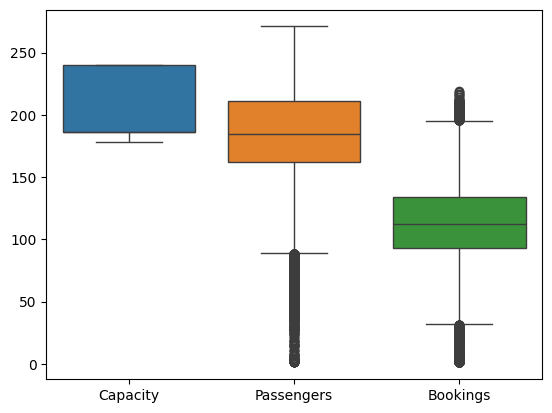

In [9]:
#Grafica boxplot de valores numericos
sns.boxplot(Flights)

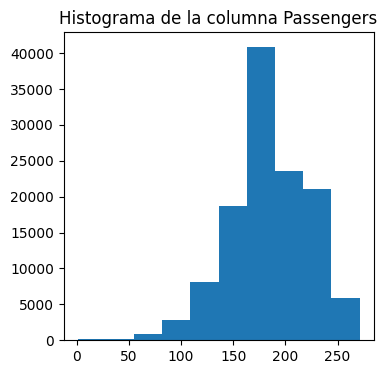

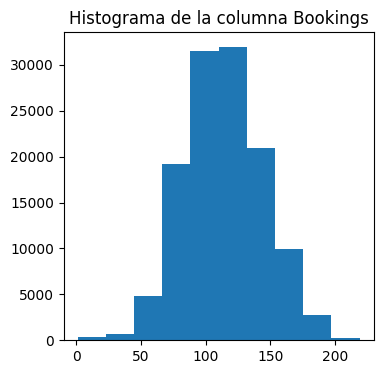

In [10]:
#Histogramas de las columnas Passengers y Bookings
for column in Flights.select_dtypes(exclude=['object',"int"]).columns:
  plt.figure(figsize=(4,4))
  plt.hist(Flights[column])
  plt.title(f"Histograma de la columna {column}")


###Procesado y limpieza de los datos

In [11]:
# Eliminar filas con valores nulos
Flights = Flights.dropna()
Flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121724 entries, 0 to 245750
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Flight_ID         121724 non-null  object 
 1   Aeronave          121724 non-null  object 
 2   DepartureStation  121724 non-null  object 
 3   ArrivalStation    121724 non-null  object 
 4   Destination_Type  121724 non-null  object 
 5   Origin_Type       121724 non-null  object 
 6   STD               121724 non-null  object 
 7   STA               121724 non-null  object 
 8   Capacity          121724 non-null  int64  
 9   Passengers        121724 non-null  float64
 10  Bookings          121724 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 11.1+ MB


In [12]:
#Acomodar los datos por fecha
Flights=Flights.sort_values(by=['STD'], ascending=True).reset_index()
Flights.drop(columns=["index"],inplace=True)
Flights.head()

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,030f35839975b1721e2427db425ef402,XA-VAJ,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-01-02 00:20:00,2023-01-02 05:20:00,186,120.0,68.0
1,7b9f51daca0f560676d28aee3d5666f7,XA-VAW,BM,BA,Ciudad Principal,Ciudad Fronteriza,2023-01-02 00:30:00,2023-01-02 06:00:00,186,170.0,99.0
2,d4ac6f26a94efea00002147f15d96a41,XA-VIU,BM,AO,Ciudad Principal,Ciudad Fronteriza,2023-01-02 00:35:00,2023-01-02 05:30:00,186,185.0,89.0
3,555496d4217768d1cc276ffbe83235d5,XA-VXF,AT,AU,Ecoturismo,Ciudad Principal,2023-01-02 00:55:00,2023-01-02 02:45:00,240,168.0,118.0
4,01cb03565042d43a1deafae09eef0ca1,XA-VAN,BM,AO,Ciudad Principal,Ciudad Fronteriza,2023-01-02 01:15:00,2023-01-02 06:10:00,186,165.0,92.0


In [13]:
#Expandir la fecha de llegada para crear columnas de hora, dia, mes y año
fechasalida = Flights['STD'].str.split("-",expand=True)
fsdh=fechasalida[2].str.split(" ",expand=True)
fechas = Flights['STD'].str.split(" ",expand=True)

#Expandir la fecha de salida para crear columnas de hora, dia, mes y año
fechallegada = Flights['STA'].str.split("-",expand=True)
flldh=fechallegada[2].str.split(" ",expand=True)
fechall = Flights['STD'].str.split(" ",expand=True)

In [14]:
#Se crean las columnas
Flights['STD'] = pd.to_datetime(Flights['STD'])
Flights['STA'] = pd.to_datetime(Flights['STA'])

Flights["YearD"]=Flights['STD'].dt.year
Flights["MonthD"]=Flights['STD'].dt.month
Flights["DayD"]=Flights['STD'].dt.day
Flights["TimeD"]=fsdh[1]
Flights["DateD"]=fechas[0]

Flights["YearA"]=fechallegada[0]
Flights["MonthA"]=fechallegada[1]
Flights["DayA"]=flldh[0]
Flights["TimeA"]=flldh[1]
Flights["DateA"]=fechas[0]


In [15]:
#Se añade una columna Duration para conocer el tiempo total de vuelo en horas
Flights['Duration'] = Flights['STA'] - Flights['STD']
Flights['Duration'] = round(Flights['Duration'].dt.total_seconds() / 3600, 2)

In [16]:
#Se sustituyen aquellos valores de pasajeros que superen la capacidad del avion
Flights.loc[Flights['Passengers'] > Flights['Capacity'], 'Passengers'] = Flights['Capacity']

# XGB

In [17]:
#Se eliminan columnas que no ayudan al modelo
Flights_xgb=Flights.drop(columns=["Flight_ID","Aeronave","STD","STA","DateD","DateA","YearA","MonthA","DayA","TimeA","Bookings"])

In [18]:
#Se convierten las variables tipo object a category
for column in Flights_xgb.select_dtypes(include=object).columns:
  Flights_xgb[column]=Flights_xgb[column].astype("category")

In [19]:
#Se separa la variable objetivo de los datos
X=Flights_xgb.drop(columns=["Passengers"])
y=Flights_xgb["Passengers"].astype(int)

In [20]:
#Se dividen los datos para entrenamiento y prueba en una razon de 80%-20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state=42)

#Se crean dos matrices
dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [21]:
# Se definen Hiperparametros
params = {"objective": "reg:squarederror",
          "eta":0.1, "max_depth":9,
          "booster":"gbtree" ,
          "tree_method":"exact",
          "grow_policy":"lossguide",
          }

#Se evalua el modelo y se reentrenan los datos
evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

n = 1001

model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
   evals=evals,
   verbose_eval=100
)

[0]	validation-rmse:34.34055	train-rmse:34.61412
[100]	validation-rmse:21.30829	train-rmse:19.11911
[200]	validation-rmse:20.52982	train-rmse:17.17741
[300]	validation-rmse:20.09956	train-rmse:15.66284
[400]	validation-rmse:19.94647	train-rmse:14.54715
[500]	validation-rmse:19.82627	train-rmse:13.63574
[600]	validation-rmse:19.71719	train-rmse:12.74847
[700]	validation-rmse:19.67609	train-rmse:12.05838
[800]	validation-rmse:19.66436	train-rmse:11.48755
[900]	validation-rmse:19.66156	train-rmse:10.95370
[1000]	validation-rmse:19.65977	train-rmse:10.48486


In [22]:
#Se realizan las predicciones
preds = model.predict(dtest_reg)

In [23]:
#Se calcula el RMSE
rmse = mean_squared_error(y_test, preds, squared=False)

print(f"RMSE del modelo: {rmse:.3f}")


RMSE del modelo: 19.660


In [24]:
#Se obtiene la R²
r2=round(100*(r2_score(y_test, preds)),2)
print(f"R²= {r2}%")

R²= 70.36%


In [25]:
#Se redondean los valores y se definen como enteros
y_pred_xgb=round(pd.DataFrame(preds)[0]).astype(int)

Text(0, 0.5, 'Valores predichos')

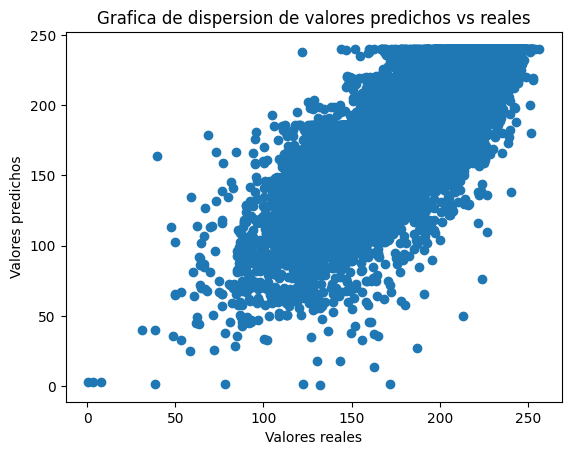

In [ ]:
#Grafica de dispersion de valores predichos vs reales
plt.scatter(preds,y_test.values)
plt.title("Grafica de dispersion de valores predichos vs reales")
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")